### Importação dos dados



In [73]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

#mostra as 5 primeiras linhas de cada DataFrame (loja, loja1, loja12, loja3)
loja3.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Secadora de roupas,eletrodomesticos,1713.50,88.823159,17/12/2021,Camila Ribeiro,CE,4,cartao_credito,4,-5.20,-39.53
1,Cômoda,moveis,386.81,18.180908,10/02/2021,Larissa Alves,RS,3,cartao_credito,1,-30.17,-53.50
2,Violão,instrumentos musicais,404.62,23.197592,22/01/2023,Lucas Oliveira,SP,5,cartao_credito,3,-22.19,-48.79
3,Bola de vôlei,esporte e lazer,78.40,4.463341,22/03/2022,Pedro Gomes,BA,4,cartao_credito,6,-13.29,-41.71
4,Guarda roupas,moveis,694.76,34.578319,12/01/2022,Bianca Santos,SP,1,cartao_credito,1,-22.19,-48.79


#1. Análise do Faturamento


In [74]:
def analisar_faturamento(loja, nome_loja):
  faturamento = loja['Preço'].sum()
  print(f'Faturamento Total da {nome_loja}: {faturamento}')
  return faturamento

faturamento_loja1 = analisar_faturamento(loja, 'Loja 1')
faturamento_loja2 = analisar_faturamento(loja2, 'Loja 2')
faturamento_loja3 = analisar_faturamento(loja3, 'Loja 3')
faturamento_loja4 = analisar_faturamento(loja4, 'Loja 4')



Faturamento Total da Loja 1: 1534509.12
Faturamento Total da Loja 2: 1488459.06
Faturamento Total da Loja 3: 1464025.03
Faturamento Total da Loja 4: 1384497.58


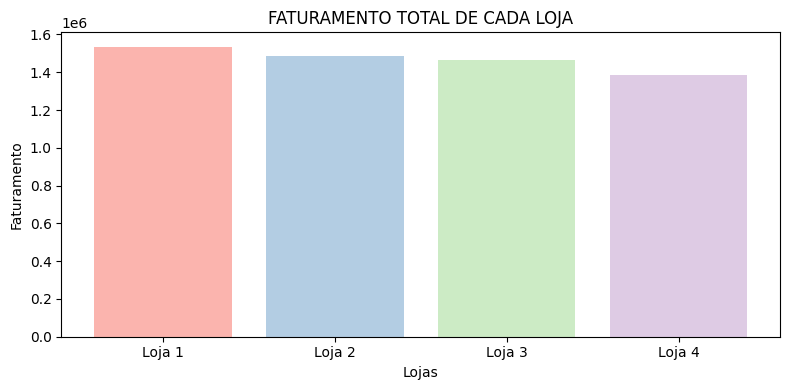

In [75]:
import matplotlib.pyplot as plt

def gerar_grafico_faturamento_total(lojas_dados):
    nomes_lojas = []
    valores_faturamento = []

    for loja, nome_loja in lojas_dados:
        nomes_lojas.append(nome_loja)
        valores_faturamento.append(loja['Preço'].sum())

    plt.figure(figsize=(8, 4))
    plt.bar(nomes_lojas, valores_faturamento, color=plt.cm.Pastel1.colors)

    plt.title('FATURAMENTO TOTAL DE CADA LOJA', fontsize=12)
    plt.xlabel('Lojas', fontsize=10)
    plt.ylabel('Faturamento', fontsize=10)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig('faturamento_total_loja.png', dpi=300, bbox_inches='tight')

    plt.show()


lojas = [(loja, 'Loja 1'), (loja2, 'Loja 2'), (loja3, 'Loja 3'), (loja4, 'Loja 4')]
gerar_grafico_faturamento_total(lojas)


# 2. Vendas por Categoria


In [76]:
def faturamento_por_categoria_mais_populares(loja, nome_loja):

    quantidade_categoria = loja.groupby('Categoria do Produto').size().reset_index(name='Quantidade de Vendas')

    quantidade_categoria = quantidade_categoria.sort_values(by='Quantidade de Vendas', ascending=False)

    print(f'\nCategorias mais populares - {nome_loja}:')
    print(quantidade_categoria)

    #print(type(quantidade_categoria))

    return quantidade_categoria

faturamento_loja1 = faturamento_por_categoria_mais_populares(loja, 'Loja 1')
faturamento_loja2 = faturamento_por_categoria_mais_populares(loja2, 'Loja 2')
faturamento_loja3 = faturamento_por_categoria_mais_populares(loja3, 'Loja 3')
faturamento_loja4 = faturamento_por_categoria_mais_populares(loja4, 'Loja 4')




Categorias mais populares - Loja 1:
    Categoria do Produto  Quantidade de Vendas
6                 moveis                   465
2            eletronicos                   448
0             brinquedos                   324
1       eletrodomesticos                   312
3        esporte e lazer                   284
4  instrumentos musicais                   182
5                 livros                   173
7  utilidades domesticas                   171

Categorias mais populares - Loja 2:
    Categoria do Produto  Quantidade de Vendas
6                 moveis                   442
2            eletronicos                   422
0             brinquedos                   313
1       eletrodomesticos                   305
3        esporte e lazer                   275
4  instrumentos musicais                   224
5                 livros                   197
7  utilidades domesticas                   181

Categorias mais populares - Loja 3:
    Categoria do Produto  Quantidade de Ven

# 3. Média de Avaliação das Lojas

In [77]:
def avaliacao_media(loja, nome_loja):

  media_loja = loja['Avaliação da compra'].mean()
  print(f'Média da {nome_loja}: {media_loja: .2f}')

avaliacao_media(loja, 'Loja 1')
avaliacao_media(loja2, 'Loja 2')
avaliacao_media(loja3, 'Loja 3')
avaliacao_media(loja4, 'Loja 4')




Média da Loja 1:  3.98
Média da Loja 2:  4.04
Média da Loja 3:  4.05
Média da Loja 4:  4.00


# 4. Produtos Mais e Menos Vendidos

In [78]:
def produtos_mais_menos_vendidos(loja, nome_loja):

  vendas_produto = loja.groupby('Produto')['Preço'].sum()

  produto_mais_vendido = vendas_produto.sort_values(ascending=False).head(1)
  produto_menos_vendido = vendas_produto.sort_values(ascending=False).tail(1)

  print(f'\n{nome_loja}')
  print(f'Produto mais vendido: \n{produto_mais_vendido}')
  print(f'Produto menos vendido: \n{produto_menos_vendido}')

lojas = [(loja, 'Loja 1'),(loja2, 'Loja 2'), (loja3, 'Loja 3'), (loja4, 'Loja 4') ]

for loja, nome in lojas:
  produtos_mais_menos_vendidos(loja, nome)



Loja 1
Produto mais vendido: 
Produto
TV Led UHD 4K    189534.28
Name: Preço, dtype: float64
Produto menos vendido: 
Produto
Corda de pular    870.89
Name: Preço, dtype: float64

Loja 2
Produto mais vendido: 
Produto
Celular Plus X42    150967.83
Name: Preço, dtype: float64
Produto menos vendido: 
Produto
Cubo mágico 8x8    858.22
Name: Preço, dtype: float64

Loja 3
Produto mais vendido: 
Produto
Geladeira    133185.99
Name: Preço, dtype: float64
Produto menos vendido: 
Produto
Cubo mágico 8x8    853.81
Name: Preço, dtype: float64

Loja 4
Produto mais vendido: 
Produto
Celular Plus X42    128930.07
Name: Preço, dtype: float64
Produto menos vendido: 
Produto
Corda de pular    939.74
Name: Preço, dtype: float64


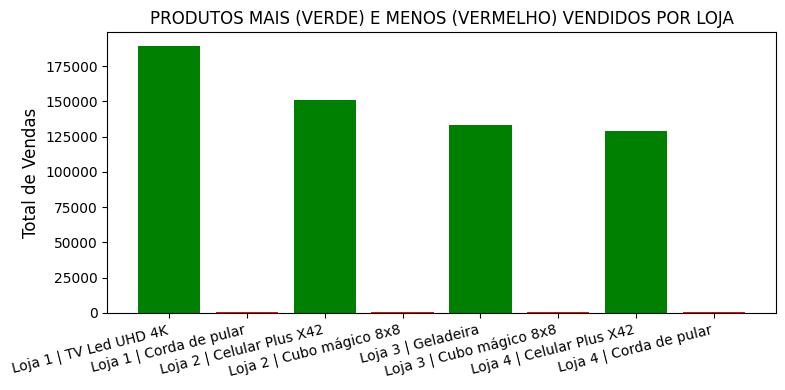

In [79]:
import matplotlib.pyplot as plt

def obter_dados_mais_menos(loja, nome_loja):
    vendas_produto = loja.groupby('Produto')['Preço'].sum()
    produto_mais_vendido = vendas_produto.sort_values(ascending=False).head(1)
    produto_menos_vendido = vendas_produto.sort_values(ascending=False).tail(1)

    # Retorna tuplas com nome_loja + nome_produto e valor total
    return [
        (f'{nome_loja} | {produto_mais_vendido.index[0]}', produto_mais_vendido.values[0]),
        (f'{nome_loja} | {produto_menos_vendido.index[0]}', produto_menos_vendido.values[0])
    ]

dados = []
for loja, nome in lojas:
    dados.extend(obter_dados_mais_menos(loja, nome))

# Separar para o gráfico
labels = [item[0] for item in dados]
valores = [item[1] for item in dados]
cores = ['green', 'red'] * 4


plt.figure(figsize=(8, 4))
plt.bar(labels, valores, color=cores)
plt.title('PRODUTOS MAIS (VERDE) E MENOS (VERMELHO) VENDIDOS POR LOJA', fontsize=12)
plt.ylabel('Total de Vendas', fontsize=12)
plt.xticks(rotation=14, ha='right')
plt.tight_layout()
plt.savefig('obter_dados_mais_menos.png', dpi=300, bbox_inches='tight')
plt.show()


# 5. Frete Médio por Loja


In [80]:
def media_loja_frete(loja, nome_loja):

    media_frete = loja['Frete'].mean()
    print(f'Média de Frete para {nome_loja}: {media_frete}')

lojas = [(loja, 'Loja 1'), (loja2, 'Loja 2'), (loja3, 'Loja 3'), (loja4, 'Loja 4')]

for loja, nome in lojas:
    media_loja_frete(loja, nome)


Média de Frete para Loja 1: 31.278997081841727
Média de Frete para Loja 2: 33.62194065817927
Média de Frete para Loja 3: 33.07446427411743
Média de Frete para Loja 4: 31.278997081841727


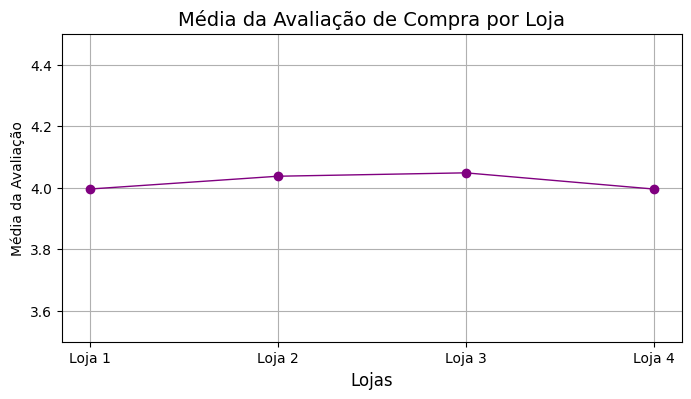

In [81]:
import matplotlib.pyplot as plt

def grafico_media_avaliacao(lojas, nomes_lojas):
    medias = [loja['Avaliação da compra'].mean() for loja in lojas]

    plt.figure(figsize=(8, 4))
    plt.plot(nomes_lojas, medias, marker='o', linestyle='-', color='purple', linewidth=1)
    plt.title('Média da Avaliação de Compra por Loja', fontsize=14)
    plt.xlabel('Lojas', fontsize=12)
    plt.ylabel('Média da Avaliação', fontsize=10)
    plt.grid(True)
    plt.ylim(3.5, 4.5)
    plt.savefig('media_avaliacao_compra.png', dpi=300, bbox_inches='tight')

    plt.show()

lojas = [loja, loja2, loja3, loja4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

grafico_media_avaliacao(lojas, nomes)


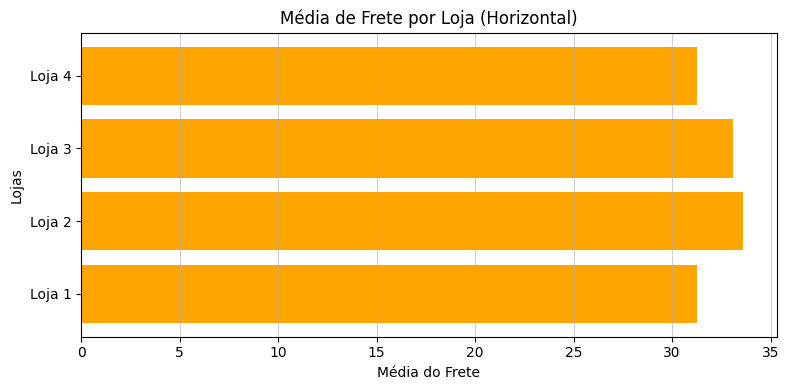

In [82]:
import matplotlib.pyplot as plt

medias = {
    'Loja 1': loja['Frete'].mean(),
    'Loja 2': loja2['Frete'].mean(),
    'Loja 3': loja3['Frete'].mean(),
    'Loja 4': loja4['Frete'].mean(),
}

lojas = list(medias.keys())
valores = list(medias.values())

plt.figure(figsize=(8,4))
plt.barh(lojas, valores, color="orange")

plt.title('Média de Frete por Loja (Horizontal)')
plt.xlabel('Média do Frete')
plt.ylabel('Lojas')
plt.grid(axis='x', linestyle='-', alpha=0.6)

plt.tight_layout()
plt.savefig('media_frete.png', dpi=300, bbox_inches='tight')

plt.show()


# 6. Análise Comparativa e Relatório Final


A **Loja 1** apresenta o maior faturamento entre todas as unidades analisadas, destacando-se também pelo baixo custo médio de frete e pela boa variedade de vendas em diferentes categorias de produtos. No entanto, sua avaliação média de clientes (3,98) é um pouco inferior em relação às demais.

A **Loja 2** mostra bom desempenho em termos de faturamento, além de se destacar como a unidade com maior sucesso no produto líder (Celular). Sua avaliação média é superior à da Loja 1, mas o custo de frete é mais elevado, o que pode impactar a competitividade.

A **Loja 3** apresenta a melhor avaliação dos clientes, o que evidencia uma maior satisfação do público, além de liderar as vendas no segmento de móveis. Contudo, possui um faturamento mais baixo e um custo de frete mais alto em comparação com as demais, reduzindo seu atrativo financeiro.

Por fim, a **Loja 4** registra o menor faturamento total entre todas, mas compensa parcialmente esse resultado com um custo de frete competitivo e um bom desempenho na categoria de brinquedos. Ainda assim, seu potencial de retorno financeiro imediato é mais limitado.

# 7. Conclusão e Recomendação


Após a análise dos fatores principais — faturamento, categorias mais populares, satisfação dos clientes e custo logístico — conclui-se que a **Loja 1** é a melhor escolha para o senhor João iniciar seu empreendimento.

Os principais motivos para essa recomendação são:

*   A **Loja 1** é a que apresenta o maior faturamento total, evidenciando maior potencial de lucro.
*   Possui baixo custo médio de frete, o que aumenta sua competitividade no mercado.
*   Apresenta bom desempenho de vendas em todas as principais categorias, garantindo diversidade de consumo.

Embora a Loja 3 tenha a melhor avaliação dos clientes, seu faturamento mais baixo e o frete mais caro reduzem sua atratividade em termos de retorno financeiro imediato.

Portanto, recomenda-se que o senhor João opte pela **Loja 1**, concentrando esforços em estratégias de melhoria no atendimento ao cliente para elevar sua avaliação e consolidar ainda mais sua posição de destaque no mercado.